In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. \
b.	What metric would you report for this dataset? \
c.	What is its value? 
## Solution:
**1(a)** We can observe that the average order value is $3145.13$ which is erroneous. The minimum order amount is 90 and the maximum order value is 704000. The standard deviation is $41282.54$ which extremely high and this is an indication tha something wrong in the observation which is misleading the average value. So, I did some analysis. It can be seen that the order amount is highly skwed towards the lower value (less than $30000$). However, we did found some ouliers ($704000$,$154350$,$102900$, $77175$, $51450$). Among these values $704000$ occured 17 times. So, apparantly these values are affecting the average value. So, **mean is not the perfect metric for this dataset since it is more sensitive to the outliers .** So, two different alternative approach can be used.
### Approach 1 (Immediate approach):
**1(b) and 1(c)** While taking the mean is misleading. We can use **median** for this data. The median value for this data is $284.00$. It is our observation that 99.1 percent order values are less than 26000. and the mean is $400.04$ for that case. So, keeping this in my consideration **I would like to report the median for this data set and the value is $284.00$.**  

### Approach 2 (Alternative approach):
We can isolate the outliers. It might not be a very good idea to remove or isolate the outliers since those data might have some other important insight. So, we can isolate the ouliers from the original dattaset and make statistical analysis for both the data to get any meaningful insight from our data.
I have shown some similar analysis below.

In [2]:
df=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [47]:
df.describe()['order_amount']

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [46]:
print(f"Highest order amount is {df['order_amount'].max()}")
print(f"Lowest order amount is {df['order_amount'].min()}")
print(f"Average order amount is {df['order_amount'].mean():.2f}")
print(f"Variance in order amount is {df['order_amount'].var()}")
print(f"Standard deviation in order amount is {df['order_amount'].std():.2f}")

Highest order amount is 704000
Lowest order amount is 90
Average order amount is 3145.13
Variance in order amount is 1704248055.0842326
Standard deviation in order amount is 41282.54


# Variance and standard deviation is way too high. So the mean here is not correct

<AxesSubplot:xlabel='order_amount'>

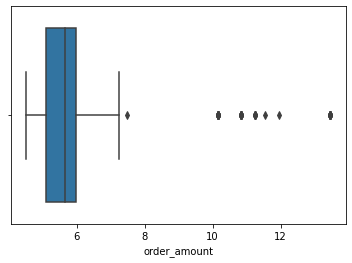

In [73]:
sns.boxplot(x=np.log(df['order_amount']))

<AxesSubplot:xlabel='order_amount'>

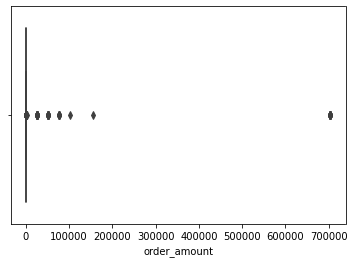

In [74]:
sns.boxplot(x=df['order_amount'])

## We have 5000 data

<AxesSubplot:ylabel='Frequency'>

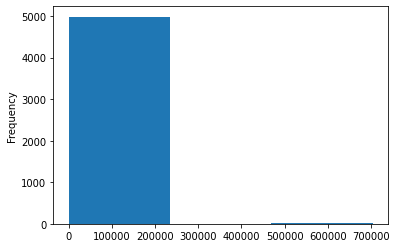

In [6]:
df['order_amount'].plot.hist(bins=3)

<AxesSubplot:ylabel='Density'>

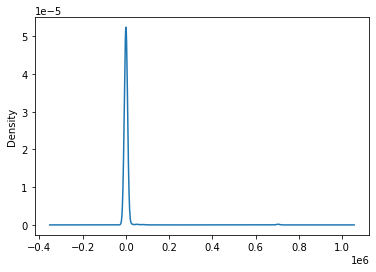

In [7]:
df['order_amount'].plot.kde()

<AxesSubplot:>

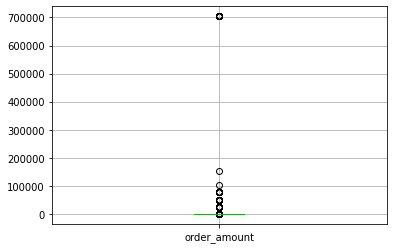

In [8]:
df.boxplot(column=['order_amount'])

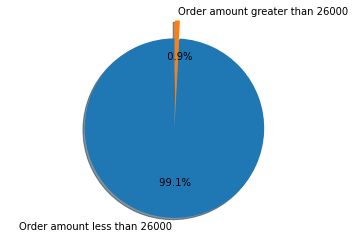

In [75]:

labels = 'Order amount less than 26000', 'Order amount greater than 26000'
sizes = [df[df['order_amount']<26000]['order_amount'].count(), df[(df['order_amount']>26000)]['order_amount'].count()]
explode = (0, 0.2) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%5.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

# Outliers detected!! 

In [96]:
print("           Statistics of the outliers")
print("============================================")
print(f"Highest order (value >$26000) amount is {df[df['order_amount']>26000]['order_amount'].max()}")
print(f"Lowest order (value >$26000) amount is {df[df['order_amount']>26000]['order_amount'].min()}")
print(f"Average order (value >$26000) amount is {df[df['order_amount']>26000]['order_amount'].mean():.2f}")
print(f"Standard deviation for order (value >$26000) is {df[df['order_amount']>26000]['order_amount'].std():.2f}")
print(f"Number of order amount greater than $26000 is {df[df['order_amount']>26000]['order_amount'].count()}")

           Statistics of the outliers
Highest order (value >$26000) amount is 704000
Lowest order (value >$26000) amount is 51450
Average order (value >$26000) amount is 312341.48
Standard deviation for order (value >$26000) is 314876.32
Number of order amount greater than $26000 is 44


In [100]:
df[df['order_amount']>26000].describe()['order_amount']

count        44.000000
mean     312341.477273
std      314876.316339
min       51450.000000
25%       51450.000000
50%       77175.000000
75%      704000.000000
max      704000.000000
Name: order_amount, dtype: float64

## Outliers and their number in the dataset

In [61]:
df[df['order_amount']>30000].groupby(['order_amount']).count()['order_id']

order_amount
51450     16
77175      9
102900     1
154350     1
704000    17
Name: order_id, dtype: int64

## statistics of the data having order values less than 26000

In [98]:
print(f"Highest order (value <$26000) amount is {df[df['order_amount']<26000]['order_amount'].max()}")
print(f"Lowest order (value <$26000) amount is {df[df['order_amount']<26000]['order_amount'].min()}")
print(f"Average order (value <$26000) amount is {df[df['order_amount']<26000]['order_amount'].mean():.2f}")
print(f"Standard deviation for order (value <$26000) is {df[df['order_amount']<26000]['order_amount'].std():.2f}")
print(f"Number of order amount less than $26000 is {df[df['order_amount']<26000]['order_amount'].count()}")

Highest order (value <$26000) amount is 25725
Lowest order (value <$26000) amount is 90
Average order (value <$26000) amount is 400.04
Standard deviation for order (value <$26000) is 1579.40
Number of order amount less than $26000 is 4956


In [101]:
df[df['order_amount']<26000].describe()['order_amount']

count     4956.000000
mean       400.043382
std       1579.398646
min         90.000000
25%        163.000000
50%        284.000000
75%        390.000000
max      25725.000000
Name: order_amount, dtype: float64

C:\Users\gmash\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unit_amt', ylabel='Density'>

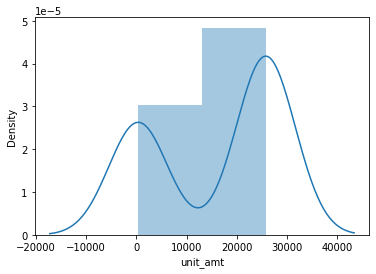

In [88]:
sns.distplot(df[df['order_amount']>26000]['unit_amt'], kde=True)

C:\Users\gmash\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unit_amt'>

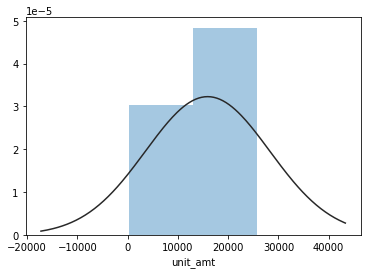

In [93]:
sns.distplot(df[df['order_amount']>26000]['unit_amt'],fit=norm ,kde=False)

# Question 2: 
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.
 ### 2 (a) How many orders were shipped by Speedy Express in total? 
 ### Answer: 54
 ### Query:
 ### SELECT COUNT(*) as Total_from_speedy_express FROM Orders group by ShipperID having ShipperID=   (SELECT ShipperID FROM Shippers  WHERE ShipperName='Speedy Express');

 ### 2 (b) 	What is the last name of the employee with the most orders?
 ### Answer: Peacock
 ### Query:
 ### SELECT LastName FROM Employees WHERE EmployeeID=(SELECT EmployeeID FROM [Orders] GROUP BY EmployeeID ORDER BY COUNT(*) DESC LIMIT 1)

 ### 2 (c) 	What product was ordered the most by customers in Germany?
 ### Answer: Boston Crab Meat
 ### Query:
 ### SELECT ProductName AS Most_Ordered_Product_from_Germany FROM OrderDetails o join Products p on o.ProductID=p.ProductID join orders on o.OrderID=orders.OrderID join customers on orders.CustomerID=customers.CustomerID Group by o.ProductID having Country='Germany' ORDER BY SUM(Quantity) DESC limit 1;
